# Assingment 1 - FAKE NEWS DETECTION

###### LIBRARIES

In [356]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import nltk  
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import re
from nltk.stem import WordNetLemmatizer

###### Loading data

In [260]:
# Loading the training data
training_data = pd.read_csv("fake_or_real_news_training.csv", encoding="utf-8")
training_data

,ID,title,text,label,X1,X2
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,NaN,NaN
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,NaN,NaN
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,NaN,NaN
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,NaN,NaN
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,NaN,NaN


###### Preprocessing the training data

In [405]:
articles = []


stemmer = WordNetLemmatizer()

for art in range(0, len(training_data["text"])):  
    # Remove special characters
    article = re.sub(r'\W', ' ', str(training_data["text"][art]))

    # remove single characters
    article = re.sub(r'\s+[a-zA-Z]\s+', ' ', article)

    # Remove single characters from the start
    article = re.sub(r'\^[a-zA-Z]\s+', ' ', article) 

    # Substituting multiple spaces with single space
    article = re.sub(r'\s+', ' ', article, flags=re.I)

    # Removing prefixed 'b'
    article = re.sub(r'^b\s+', '', article)

    # Converting to Lowercase
    article = article.lower()

    # Lemmatization
    article = article.split()

    article = [stemmer.lemmatize(word) for word in article]
    article = ' '.join(article)

    articles.append(article)

In [406]:
training_data["text"] = articles

In [119]:
# Loading the testing data
testing_data = pd.read_csv("fake_or_real_news_test.csv", encoding="utf-8")
testing_data["label"]=np.nan
testing_data

,ID,title,text,label
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...,NaN
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...,NaN
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...,NaN
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...,NaN
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...,NaN
5,8430,Hillary’s Crime Family: End Of Days For The U....,"Financial Markets , Market Manipulation , U.S....",NaN
6,1220,"Why pundits, politicians and the press hate Te...",Senator Ted Cruz is now the frontrunner in the...,NaN
7,9624,"WSJ Report Not About Black Rapists At Baylor, ...",X Dear Reader! VDARE.com isn’t just a website....,NaN
8,8211,The ‘Two-Party Racket’ Is Incapable of Dealing...,The ‘Two-Party Racket’ Is Incapable of Dealing...,NaN
9,4099,"Just the Beginning? Religious Freedom, Gay Rig...",Ten months after the Supreme Court passed a la...,NaN


###### Preprocessing the testing data

In [357]:
articles_test = []

stemmer = WordNetLemmatizer()

for art in range(0, len(testing_data["text"])):  
    # Remove  special characters
    article = re.sub(r'\W', ' ', str(testing_data["text"][art]))

    # remove single characters
    article = re.sub(r'\s+[a-zA-Z]\s+', ' ', article)

    # Remove single characters from the start
    article = re.sub(r'\^[a-zA-Z]\s+', ' ', article) 

    # Substituting multiple spaces with single space
    article = re.sub(r'\s+', ' ', article, flags=re.I)

    # Removing prefixed 'b'
    article = re.sub(r'^b\s+', '', article)

    # Converting to Lowercase
    article = article.lower()

    # Lemmatization
    article = article.split()

    article = [stemmer.lemmatize(word) for word in article]
    article = ' '.join(article)

    articles_test.append(article)

In [358]:
testing_data["text"]= articles_test

###### Create a series to store the labels for the training data: y

In [359]:
y = training_data.label

###### Create training and test sets

In [360]:
X_train, X_test, y_train, y_test = train_test_split(training_data["text"], y, test_size=0.33, random_state=53)

### CountVectorizer for text classification

In [361]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

In [362]:
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

In [363]:
# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

In [364]:
# Print the first 5 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:5])

['00', '000', '0000', '00000031', '0001']


### TfidfVectorizer for text classification

In [365]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
# Using the max_df argument which removes words which appear in more than 70% of the articles.
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

In [366]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [367]:
# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [368]:
# Print the first 5 features
print(tfidf_vectorizer.get_feature_names()[:5])

['00', '000', '0000', '00000031', '0001']


In [369]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.0163049 0.        ... 0.        0.        0.       ]]


### Inspecting the vectors

In [419]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df

,00,000,0000,00000031,0001,0002,000billion,000ft,000km,000x,...,ťđ,ź50,ελληνικά,русский,эa,эin,эthe,яркий,عربي,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [420]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df= pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df 

,00,000,0000,00000031,0001,0002,000billion,000ft,000km,000x,...,ťđ,ź50,ελληνικά,русский,эa,эin,эthe,яркий,عربي,ยงade
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.016305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.007159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.028276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.020142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

{'ha', 'wa'}

In [422]:
print(count_df.equals(tfidf_df))

False


###### As we can see both vectorizers extracted the same tokens but they are not equal since they have different weghts.

##  Naive Bayes 

###### Training and testing the "fake news" model with CounterVectorizer

In [283]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)
# Create the predicted tags
pred = nb_classifier.predict(count_test)

In [284]:
# Calculate the accuracy score: 
score = metrics.accuracy_score(y_test, pred)
score

0.878030303030303

###### The accuracy score of the Naive Bayes algorithm on Count Vectors is 0.878.

###### Confusion Matrix

In [285]:
# Calculate the confusion matrix:
confusion_matrix = metrics.confusion_matrix(y_test, pred, labels=["REAL", "FAKE"])
confusion_matrix
# The main diagonal show true scores meaning true classifications of both labels base on the text bag of words vectors.

array([[609,  37],
       [112, 550]])

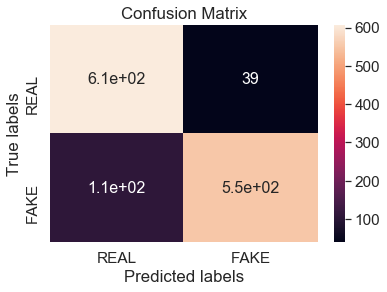

In [139]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

###### Training and testing the "fake news" model with TfidfVectorizer

In [286]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier_tf = MultinomialNB()

In [287]:
# Fit the classifier to the training data
nb_classifier_tf.fit(tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [288]:
# Create the predicted tags:
pred = nb_classifier_tf.predict(tfidf_test)

In [289]:
# Calculate the accuracy score:
score = metrics.accuracy_score(y_test,pred)
score

0.7901515151515152

In [373]:
# Calculate the confusion matrix: cm
confusion_matrix = metrics.confusion_matrix(y_test,pred, labels=["REAL", "FAKE"])
confusion_matrix

array([[560,  86],
       [ 74, 588]])

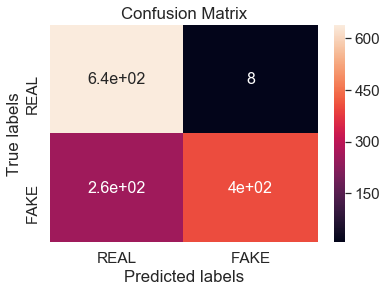

In [145]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

###### The accuracy score of the Naive Bayes algorithm on TF-IDF Vectors is 0.790.

###### Naive Bayes on Ngram Level TF IDF Vectors

In [374]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(training_data['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [375]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
# Fit the classifier to the training data
nb_classifier.fit(xtrain_tfidf_ngram, y_train)
# Create the predicted tags
pred = nb_classifier.predict(xvalid_tfidf_ngram)

# Calculate the accuracy score:
score = metrics.accuracy_score(y_test, pred)
score

0.8696969696969697

###### The accuracy score of the Naive Bayes on Ngram Level TF IDF Vectors is 0.869.

### Improving the model

###### Test a few different alpha levels using the Tfidf vectors to determine if there is a better performing combination.

In [376]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

In [377]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier_tf = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier_tf.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier_tf.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [378]:
# Iterate over the alphas and print the corresponding score. We see that we alpha=0.1 we get a score=0.889.
# Clearly the TfidfVectorizer works better.
for alpha in alphas:
    print("Alpha: ", alpha)
    print("Score: ", train_and_predict(alpha))
    print()

Alpha:  0.0


/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8651515151515151

Alpha:  0.1
Score:  0.8893939393939394

Alpha:  0.2
Score:  0.8727272727272727

Alpha:  0.30000000000000004
Score:  0.8621212121212121

Alpha:  0.4
Score:  0.8484848484848485

Alpha:  0.5
Score:  0.8371212121212122

Alpha:  0.6000000000000001
Score:  0.8242424242424242

Alpha:  0.7000000000000001
Score:  0.8113636363636364

Alpha:  0.8
Score:  0.8007575757575758

Alpha:  0.9
Score:  0.7954545454545454



###### Create a Multinomial Naive Bayes classifier with alpha=0.1

In [379]:
# Create a Multinomial Naive Bayes classifier
nb_classifier_tf = MultinomialNB(alpha=0.1)
# Fit the classifier to the training data
nb_classifier_tf.fit(tfidf_train, y_train)
# Create the predicted tags:
pred = nb_classifier_tf.predict(tfidf_test)

In [413]:
# Calculate the accuracy score:
score = metrics.accuracy_score(y_test,pred)
score

0.9212121212121213

In [381]:
# Calculate the confusion matrix: cm
confusion_matrix = metrics.confusion_matrix(y_test,pred, labels=["REAL", "FAKE"])
confusion_matrix

array([[618,  28],
       [106, 556]])

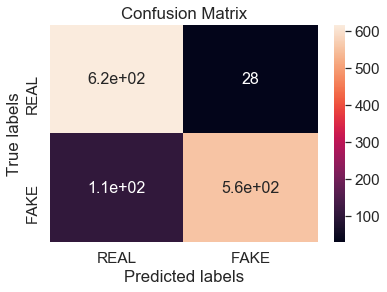

In [382]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

In [383]:
# Final prediction on the testing_dataset
#tfidf_test_1 = tfidf_vectorizer.transform(testing_data['text'])
#pred1 = nb_classifier_tf.predict(tfidf_test_1)

###### NB, Count Vectors:  0.878
###### NB, WordLevel TF-IDF:  0.889
###### NB, N-Gram Vectors:  0.869

In [414]:
#id = testing_data['ID']
#output = pd.DataFrame({ 'id' : id, 'label': pred1 })
#output.to_csv('prediction1.csv', index = False)

### The Passive Aggressive algorithm

In [386]:
linear_classifier = sklearn.linear_model.PassiveAggressiveClassifier(n_iter=50)

In [412]:
linear_classifier.fit(tfidf_train, y_train)
pred = linear_classifier.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.921


###### The accuracy score of the Passive Aggresive algorithm  is 0.920.

In [159]:
confusion_matrix = metrics.confusion_matrix(y_test,pred, labels=["REAL", "FAKE"])
confusion_matrix

array([[595,  51],
       [ 39, 623]])

###### The confusion matrix is different from the above-mentioned one and we get a better classification
###### for our articles!

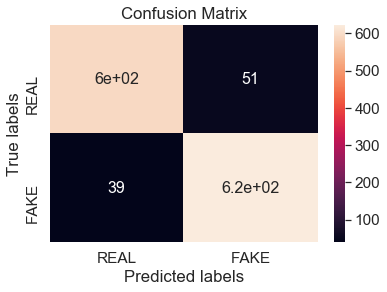

In [160]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

In [408]:
# Final prediction on the testing_dataset

#tfidf_test_1 = tfidf_vectorizer.transform(testing_data['text'])
#pred2 = nb_classifier_tf.predict(tfidf_test_1)

In [409]:
#id = testing_data['ID']
#output = pd.DataFrame({ 'id' : id, 'label': pred2 })
#output.to_csv('prediction2.csv', index = False)

###### Following we test if tuning the alpha parameter for a MultinomialNB creates better results. 

In [389]:
classifier = MultinomialNB(alpha=0.1)

In [390]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier_tf = MultinomialNB(alpha=alpha)
    nb_classifier_tf.fit(tfidf_train, y_train)
    pred = nb_classifier_tf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        classifier = nb_classifier_tf
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.86515
Alpha: 0.10 Score: 0.88939
Alpha: 0.20 Score: 0.87273
Alpha: 0.30 Score: 0.86212
Alpha: 0.40 Score: 0.84848
Alpha: 0.50 Score: 0.83712
Alpha: 0.60 Score: 0.82424
Alpha: 0.70 Score: 0.81136
Alpha: 0.80 Score: 0.80076
Alpha: 0.90 Score: 0.79545


###### As we can see, tuning the alpha parameter does not improve our classifier.

###### Now, let's use our Passive Agressive classifier with the TF-IDF vector in order to know which are 
###### the 20 most important vectors from the articles.


In [397]:
feature_names = tfidf_vectorizer.get_feature_names()

In [400]:
### The vectors that are more real
sorted(zip(classifier.coef_[0], feature_names),  reverse=True)[:20]

[(-9.97410614366745, 'ignores'),
 (-10.262230448653654, 'video'),
 (-10.328807130921426, 'medium'),
 (-10.639209587408002, 'ยงade'),
 (-10.639209587408002, 'عربي'),
 (-10.639209587408002, 'яркий'),
 (-10.639209587408002, 'эthe'),
 (-10.639209587408002, 'эin'),
 (-10.639209587408002, 'эa'),
 (-10.639209587408002, 'русский'),
 (-10.639209587408002, 'ελληνικά'),
 (-10.639209587408002, 'ź50'),
 (-10.639209587408002, 'ťđ'),
 (-10.639209587408002, 'ťwho'),
 (-10.639209587408002, 'ťtwo'),
 (-10.639209587408002, 'ťthird'),
 (-10.639209587408002, 'ťthe'),
 (-10.639209587408002, 'ťsecond'),
 (-10.639209587408002, 'ťpilgrim'),
 (-10.639209587408002, 'ťnon')]

In [168]:
### The vectors that are more fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.757110586765661, '00'),
 (-10.757110586765661, '000'),
 (-10.757110586765661, '0000'),
 (-10.757110586765661, '00000031'),
 (-10.757110586765661, '0001'),
 (-10.757110586765661, '0002'),
 (-10.757110586765661, '000billion'),
 (-10.757110586765661, '000ft'),
 (-10.757110586765661, '000km'),
 (-10.757110586765661, '000x'),
 (-10.757110586765661, '001'),
 (-10.757110586765661, '003'),
 (-10.757110586765661, '004'),
 (-10.757110586765661, '005'),
 (-10.757110586765661, '006'),
 (-10.757110586765661, '009'),
 (-10.757110586765661, '0099'),
 (-10.757110586765661, '00am'),
 (-10.757110586765661, '00p'),
 (-10.757110586765661, '00pm')]

## SVM classifier

In [410]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [402]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
predictions_SVM

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'FAKE', 'FAKE'], dtype=object)

In [403]:
# Use accuracy_score function to get the accuracy
score = metrics.accuracy_score(y_test, predictions_SVM)
print("accuracy:   %0.3f" % score)

accuracy:   0.924


In [317]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions_SVM, labels=["REAL", "FAKE"])
confusion_matrix

array([[589,  57],
       [ 31, 631]])

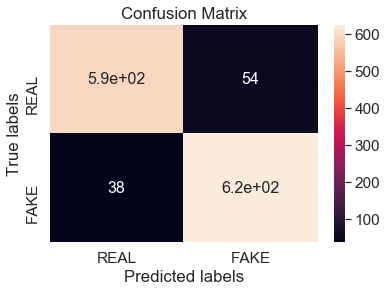

In [189]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

In [415]:
# Final prediction on the testing_dataset

tfidf_test_svm = tfidf_vectorizer.transform(testing_data['text'])
prediction_3 = SVM.predict(tfidf_test_svm)

In [417]:
#id = testing_data['ID']
#output = pd.DataFrame({ 'id' : id, 'label': prediction_3 })
#output.to_csv('prediction3_SVM.csv',  index = False)

###### SVM on Ngram Level TF-IDF Vectors

In [445]:
# Fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(xtrain_tfidf_ngram,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xvalid_tfidf_ngram)
predictions_SVM

# Use accuracy_score function to get the accuracy
score = metrics.accuracy_score(y_test, predictions_SVM)
print("accuracy:   %0.3f" % score)

accuracy:   0.890


###### SVM: 0.924
###### SVM, N-Gram Vectors:  0.890

###### After trying the SVM model we can see that the accuracy score increase from 0.920 to 0.924 which means
###### that our SVM algorithm performs better!

## Logistic Regression

In [318]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.928030303030303


In [198]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred, labels=["REAL", "FAKE"])
confusion_matrix

array([[590,  56],
       [ 29, 633]])

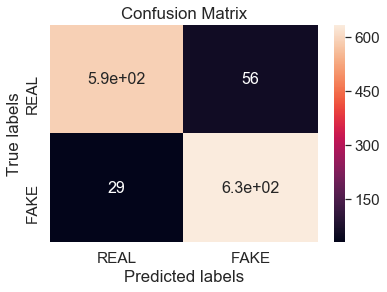

In [199]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

###### The accuracy score of the Logistic Regression is 0.928.

In [338]:
id = testing_data['ID']
output = pd.DataFrame({ 'id' : id, 'label': pred2 })
output.to_csv('prediction3.csv', index = False)

## Random Forest

In [335]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(tfidf_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [336]:
y_pred = classifier.predict(tfidf_test)

###### Evaluating the Model

In [321]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred, labels=["REAL", "FAKE"])
confusion_matrix

array([[596,  50],
       [ 62, 600]])

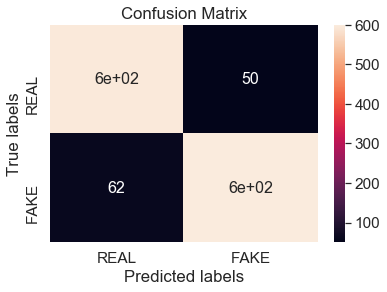

In [322]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

In [337]:
print(accuracy_score(y_test, y_pred))  

0.906060606060606


###### Random Forest on Count Vectors

In [346]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(count_train, y_train)  
y_pred = classifier.predict(count_test)
print(accuracy_score(y_test, y_pred))  


0.9128787878787878


###### Random Forest, Count Vectors:  0.912
###### Random Forest,  TF-IDF Vectors:  0.906

## HashingVectorizer

In [324]:
hash_vectorizer= HashingVectorizer(stop_words="english", non_negative=True)
hash_train= hash_vectorizer.fit_transform(X_train)
hash_test=hash_vectorizer.transform(X_test)

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [325]:
clf=MultinomialNB(alpha=.01)

In [326]:
clf.fit(hash_train,y_train)
pred=clf.predict(hash_test)
print(accuracy_score(y_test, pred))  

confusion_matrix = metrics.confusion_matrix(y_test,pred, labels=["REAL", "FAKE"])
confusion_matrix

0.8848484848484849


array([[622,  24],
       [116, 546]])

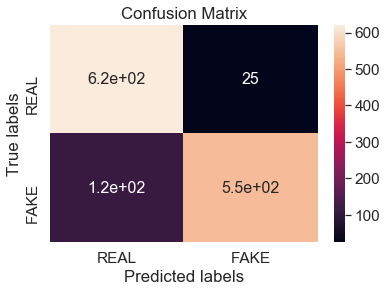

In [248]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

###### After running the HashingVectorizer we can see that it performs better that the TfidfVectorizer + MultinomialNB()
###### which got an accuracy of 0.790.

In [327]:
clf=PassiveAggressiveClassifier(n_iter=50)

In [328]:
clf.fit(hash_train, y_train)
pred=clf.predict(hash_test)
print(accuracy_score(y_test, pred)) 

/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vanessalopezgarcia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.9128787878787878


In [254]:
confusion_matrix = metrics.confusion_matrix(y_test,pred, labels=["REAL", "FAKE"])
confusion_matrix

array([[591,  55],
       [ 45, 617]])

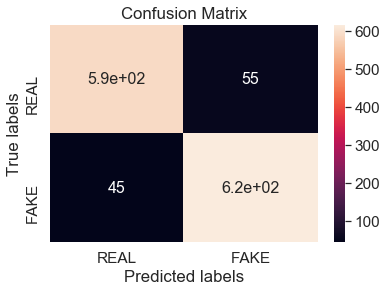

In [255]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['REAL', 'FAKE']); ax.yaxis.set_ticklabels(['REAL', 'FAKE']);

###### After running the HashingVectorizer + PassiveAgressive linear algorithm we see that we are not improving the 
###### score of the TfidfVectorizer + PassiveAgressive algorithm which had an accuracy of 0.920.

###### As conclusion, the best performing algorithm is SVM with an accuracy score of 0.924. 
###### The predictions generated by the algorithm has been loaded into a csv called "prediction3_SVM".